In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import feature_engineering
import quadratic_weighted_kappa

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

%reload_ext autoreload
%autoreload 2

### Preparing the data

In [2]:
data = pd.read_csv('data_minus_images/train.csv')

In [4]:
pet_df = feature_engineering.add_everything(data)

In [5]:
pet_df.head()

,PetID,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,...,score,language,BreedName,BreedGroup,BreedGroupID,purebred,desc_len,start_cap,num_colors,has_name
0,86e1089a3,2,Nibble,3,299,0,1,1,7,0,...,0.3,en,Tabby,CAT,-1,1,359,1,2,1
1,1bf1f95ef,2,Mimi,12,299,0,2,3,6,7,...,0.0,None,Tabby,CAT,-1,1,40,1,3,1
2,987baa1c7,2,Tabby Male,48,299,0,1,1,2,7,...,0.3,en,Tabby,CAT,-1,1,707,1,3,1
3,5c546c236,2,Manja,4,299,0,2,1,2,0,...,0.4,en,Tabby,CAT,-1,1,130,1,2,1
4,c2346525a,2,Cham,8,299,0,1,3,0,0,...,0.5,en,Tabby,CAT,-1,1,99,1,1,1


In [6]:
pet_df[pet_df['AdoptionSpeed']==0].describe(include='all')

,PetID,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,...,score,language,BreedName,BreedGroup,BreedGroupID,purebred,desc_len,start_cap,num_colors,has_name
count,410,410.000000,384,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,...,410.000000,384,410,410,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000
unique,410,NaN,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3,52,8,NaN,NaN,NaN,NaN,NaN,NaN
top,e42dc215d,NaN,Lucky,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,en,Domestic Short Hair,CAT,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,382,92,240,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.585366,NaN,10.451220,251.097561,96.575610,1.721951,2.402439,3.509756,2.158537,...,0.277317,NaN,NaN,NaN,-0.041463,0.485366,303.834146,0.797561,2.058537,0.936585
std,NaN,0.493261,NaN,17.775118,64.528156,128.641312,0.652815,1.770857,2.764807,3.118952,...,0.281626,NaN,NaN,NaN,1.854285,0.500396,298.961997,0.402309,0.776481,0.244005
min,NaN,1.000000,NaN,0.000000,19.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,-0.700000,NaN,NaN,NaN,-1.000000,0.000000,2.000000,0.000000,1.000000,0.000000
25%,NaN,1.000000,NaN,2.000000,251.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.100000,NaN,NaN,NaN,-1.000000,0.000000,100.250000,1.000000,1.000000,1.000000
50%,NaN,2.000000,NaN,3.000000,266.000000,0.000000,2.000000,2.000000,3.000000,0.000000,...,0.200000,NaN,NaN,NaN,-1.000000,0.000000,224.000000,1.000000,2.000000,1.000000
75%,NaN,2.000000,NaN,12.000000,292.000000,265.000000,2.000000,3.000000,6.000000,6.750000,...,0.400000,NaN,NaN,NaN,0.000000,1.000000,398.000000,1.000000,3.000000,1.000000


In [55]:
pet_df.describe(include='all')

,PetID,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,...,score,language,BreedName,BreedGroup,BreedGroupID,purebred,desc_len,start_cap,num_colors,has_name
count,14988,14988.000000,13732,14988.000000,14988.000000,14988.000000,14988.000000,14988.000000,14988.000000,14988.000000,...,14988.000000,14437,14988,14988,14988.000000,14988.000000,14988.000000,14988.000000,14988.000000,14988.000000
unique,14988,NaN,9056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4,175,11,NaN,NaN,NaN,NaN,NaN,NaN
top,a86f09670,NaN,Baby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,en,Mixed Breed,MIXED,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,14304,5927,7032,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.457699,NaN,10.450027,265.361089,73.960302,1.776088,2.234388,3.222978,1.881705,...,0.270616,NaN,NaN,NaN,-0.106685,0.415733,339.351681,0.854217,1.994462,0.916200
std,NaN,0.498224,NaN,18.151416,59.871029,122.987361,0.681596,1.745455,2.742828,2.983879,...,0.276706,NaN,NaN,NaN,1.570403,0.492864,373.414987,0.352901,0.768732,0.277097
min,NaN,1.000000,NaN,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,-0.900000,NaN,NaN,NaN,-1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,NaN,1.000000,NaN,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.100000,NaN,NaN,NaN,-1.000000,0.000000,117.000000,1.000000,1.000000,1.000000
50%,NaN,1.000000,NaN,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,...,0.200000,NaN,NaN,NaN,0.000000,0.000000,238.000000,1.000000,2.000000,1.000000
75%,NaN,2.000000,NaN,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,...,0.400000,NaN,NaN,NaN,0.000000,1.000000,431.000000,1.000000,3.000000,1.000000


(array([  79.,    0.,  651.,    0.,    0.,  874.,    0.,  707.,    0.,
        1117.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

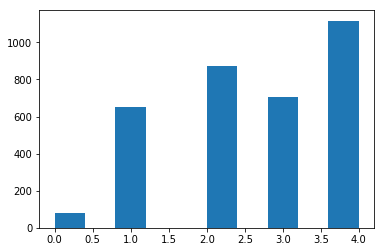

In [41]:
plt.hist(data[data['Quantity']>1]['AdoptionSpeed'])

(array([ 331.,    0., 2439.,    0.,    0., 3163.,    0., 2552.,    0.,
        3080.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

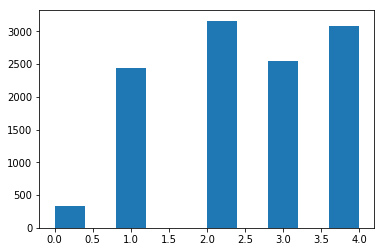

In [43]:
plt.hist(data[data['Quantity']<=1]['AdoptionSpeed'])

In [13]:
pet_df.BreedGroup.unique()

array(['CAT', 'MIXED', 'MISC', 'HOUND', 'WORKING', 'TOY', 'SPORTING',
       'HERDING', 'TERRIER', 'NON-SPORTING', 'FSS'], dtype=object)

In [11]:
def dummify(X, cat_features):
    for feat in cat_features:
        dummies = pd.get_dummies(X[feat], prefix=feat)
        dummies.drop(dummies.columns[-1], axis=1, inplace=True)
        X = X.drop(feat, axis=1).merge(dummies, left_index=True, right_index=True)
    return X

In [12]:
X = pet_df.drop(columns=['Name','RescuerID','Description','PetID','AdoptionSpeed', 'BreedName', 'BreedGroupID'])
y = pet_df['AdoptionSpeed'].astype('str')

In [13]:
cat_features = ['Type', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'State', 'language', 'BreedGroup']
X = dummify(X, cat_features)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [18]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [19]:
y_predict = gbc.predict(X_test)
quadratic_weighted_kappa.quadratic_weighted_kappa(y_predict, y_test)

0.3359968579383745

In [20]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [21]:
y_predict = gbr.predict(X_test)
y_predict = y_predict.round()
quadratic_weighted_kappa.quadratic_weighted_kappa(y_predict, y_test)

0.25272223827522244

In [22]:
gbc_tuned = GradientBoostingClassifier(n_estimators=80, 
                                       max_features=11, 
                                       min_samples_leaf=40, 
                                       max_depth=11, 
                                       min_samples_split=600)
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=11,
              max_features=11, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=40, min_samples_split=600,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [23]:
y_predict = gbc_tuned.predict(X_test)
quadratic_weighted_kappa.quadratic_weighted_kappa(y_predict, y_test)

0.32547076833589905

In [24]:
gbr_tuned = GradientBoostingRegressor(n_estimators=80, 
                                       max_features=11, 
                                       min_samples_leaf=40, 
                                       max_depth=11, 
                                       min_samples_split=600)
gbr_tuned.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=11, max_features=11,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=40,
             min_samples_split=600, min_weight_fraction_leaf=0.0,
             n_estimators=80, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
y_predict = gbr_tuned.predict(X_test)
y_predict = y_predict.round()
quadratic_weighted_kappa.quadratic_weighted_kappa(y_predict, y_test)

0.23879387583099043

In [29]:
most_important_features = list(X_train.columns[gbc.feature_importances_.argsort()][-30:])

In [30]:
X = X[most_important_features]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [38]:
gbc = GradientBoostingClassifier(max_depth=7, max_features='sqrt', n_estimators=500, min_samples_leaf=3)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=3, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [39]:
y_predict = gbc.predict(X_test)
quadratic_weighted_kappa.quadratic_weighted_kappa(y_predict, y_test)

0.33041040273425015

In [ ]:
X = pet_df.drop(columns=['Name','RescuerID','Description','PetID','AdoptionSpeed', 'BreedName', 'BreedGroupID'])
y = pet_df['AdoptionSpeed'].astype('str')

cat_features = ['Type', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'State', 'language', 'BreedGroup']
X = dummify(X, cat_features)